## Supplementary notebook for Size matters: An analytical study of the role of tissue size in spatiotemporal distribution of morphogens unveils a transition between different Reaction-Diffusion regimes.
### Alberto S. Ceccarelli <sup>1</sup> , Augusto Borges <sup>1, 2, 3</sup> & Osvaldo Chara <sup>1,4,5</sup>
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### 5 Instituto de Tecnología, Universidad Argentina de la Empresa (UADE), Buenos Aires, Argentina.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig S.1 from the paper.
#### Run the following cell to plot fig S.1 from the paper and to save it as a png image.
##### Expected computational time: 30 minutes.

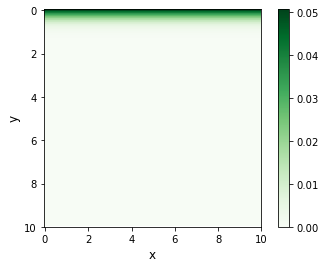

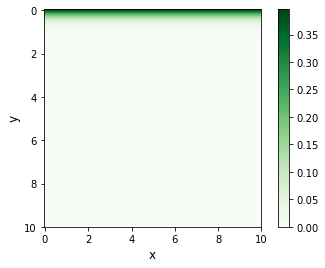

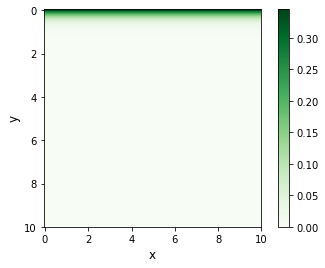

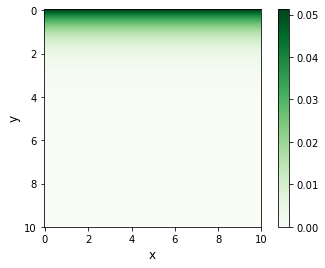

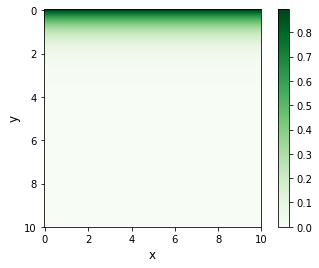

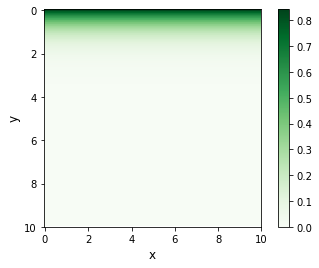

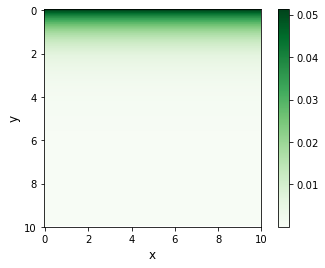

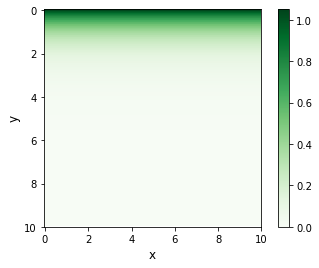

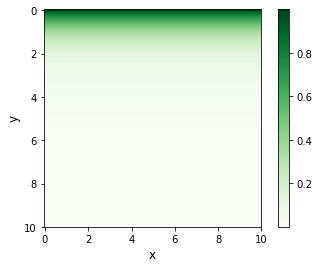

My program took 660.2789599895477 seconds to run


In [2]:
# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))

# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
    return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux4(j):
    return (j)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux5(x,t,j):
    return (2/R)*np.cos(aux4(j)*x)*(1/(aux4(j)**2+1))*(np.exp(-((((aux4(j))**2)+1)*t)))


# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work for reflecting boundary conditions.
def c_finite2(x,t,j):
    return -sum(aux5(x,t,j))-(np.exp(-x)/(np.exp(-2*R)-1)+np.exp(x)/(1-np.exp(2*R)))-np.exp(-t)/R

# Figure S.1. Comparison between the numerical and analytical solution for the concentration as a
# function of space for different times.

# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Define functions used to calculate the morphogen concentration

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))

# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
    return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))

# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux4(j):
    return (j)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux5(x,t,j):
    return (2/R)*np.cos(aux4(j)*x)*(1/(aux4(j)**2+1))*(np.exp(-((((aux4(j))**2)+1)*t)))


# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work for reflecting boundary conditions.
def c_finite2(x,y,t,j):
    return -sum(aux5(x,t,j))-(np.exp(-x)/(np.exp(-2*R)-1)+np.exp(x)/(1-np.exp(2*R)))-np.exp(-t)/R-sum(aux5(y,t,j))-(np.exp(-y)/(np.exp(-2*R)-1)+np.exp(y)/(1-np.exp(2*R)))-np.exp(-t)/R

# This part of the code will plot the analytical solution.

# Define an array of terms to be used when calculating c_finite(x,t,j)
j = np.arange(0,5000,1)
# Define the lengths of the tissues that are going to be simulated.
lengths = [0.1, 1, 5, 10]
# Define the times that are going to be simulated.
times = [0.1, 1, 10]
# Define colors that are going to be used when ploting the solutions
colors_line = ["g", "b", "r"]
colors_dashed = ["lightgreen", "lightblue", "pink"]
# Define the positions in the figure that are going to be used when plotting.
positions = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1]]
# Define a counter used when plotying
position_counter = 0
# Loop for all lengths

# This part of the code will plot the numerical solution.

# Define arrays to be used later.    
lengths = [10]
times = [0.1, 1, 10]
color_counter = 0
position_counter = 0
# Loop over all tissue lengths.
for length in lengths:
    R = length
#     Set the number of positions in the tissue
    nx=100;
    ny=100;
#     Set the length of each position step
    dx=length/nx;
    dy=length/ny;
#     Set the time step such that the simulation does not oscilate
    dt=min((dx**2)/3,(dx**2)/3)/2;
#     Calculate the maximun number of times to be simulated.
    tmax=max(times)
    nt=int(tmax/dt)+1;
#     Define array to be used later. 
    p1 = np.zeros([nx,ny,2]);
    color_counter = 0
#     Loop over time.
    for m in range(1,nt+1):
#         Loop over positions.
        for xi in np.arange(1,nx-1):
            for yi in np.arange(1,ny-1):
#             Calculate the new concentration.
                p1[xi,yi,1]=p1[xi,yi,0]+dt*((p1[xi+1,yi,0]-2*p1[xi,yi,0]+p1[xi-1,yi,0])/np.power(dx,2))+dt*((p1[xi,yi+1,0]-2*p1[xi,yi,0]+p1[xi,yi-1,0])/np.power(dy,2))-dt*p1[xi,yi,0];
        for yi in np.arange(0,ny):
            p1[nx-1,yi,1]=0;
            p1[0,yi,1]=p1[1,yi,1]+dx;
        for xi in np.arange(0,nx):
            p1[xi,ny-1,1]=p1[xi,ny-2,1];
            p1[xi,0,1]=p1[xi,1,1];
#         To avoid consuming to much ram only the current and the previous time are stored on ram. Overwrite a previous time.
        for xi in np.arange(0,nx):
            for yi in np.arange(0,ny):
                p1[xi,yi,0]=p1[xi,yi,1]
#         if the current time is of our interest we enter here.        
        if round(m*dt,10) in times:
            ctoplot=np.zeros([nx,ny]);
            ctoplot2=np.zeros([nx,ny]);
            ctoplot3=np.zeros([nx,ny]);

            for xi in np.arange(0,nx):
                for yi in np.arange(0,ny):
                    ctoplot2[xi,yi]=p1[xi,yi,0]
                    ctoplot[xi,yi]=abs(p1[xi,yi,0]-c_finite(xi*dx,m*dt,j))
                    ctoplot3[xi,yi]=c_finite(xi*dx,m*dt,j)
            plt.imshow(ctoplot,cmap="Greens")
            plt.colorbar()
            plt.xlabel("x",fontsize= 12)
            plt.ylabel("y",fontsize= 12)
            plt.xticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.yticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.savefig("fig2s-difference-sink-time"+str(m*dt)+".png", dpi=500)
            plt.show()
            plt.close()
            plt.imshow(ctoplot2,cmap="Greens")
            plt.colorbar()
            plt.xlabel("x",fontsize= 12)
            plt.ylabel("y",fontsize= 12)
            plt.xticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.yticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.savefig("fig2s-numerical-sink-time"+str(m*dt)+".png", dpi=500)
            plt.show()
            plt.close()
            plt.imshow(ctoplot3,cmap="Greens")
            plt.colorbar()
            plt.xlabel("x",fontsize= 12)
            plt.ylabel("y",fontsize= 12)
            plt.xticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.yticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.savefig("fig2s-analytical-sink-time"+str(m*dt)+".png", dpi=500)
            plt.show()
            plt.close()
    position_counter += 1
    
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

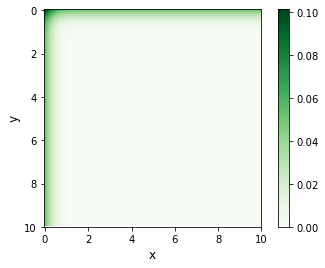

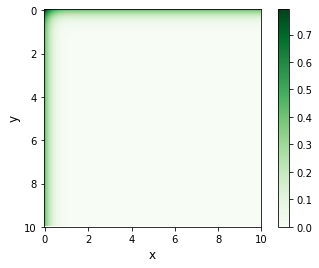

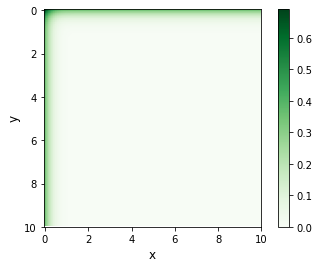

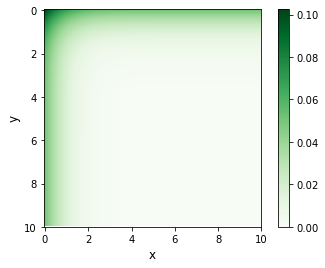

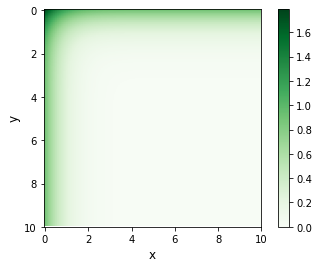

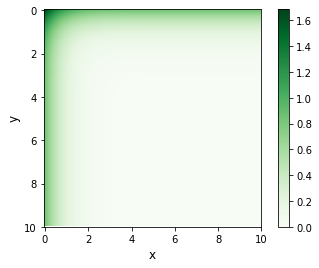

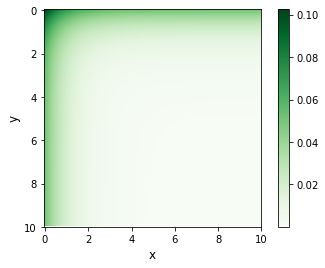

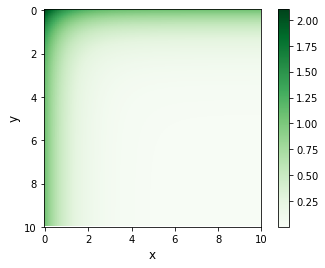

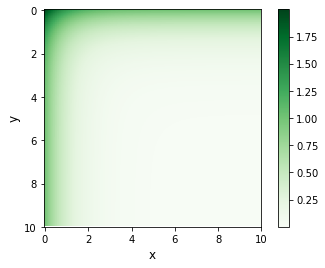

My program took 674.8001635074615 seconds to run


In [3]:
# Figure S.1. Comparison between the numerical and analytical solution for the concentration as a
# function of space for different times.

# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Define functions used to calculate the morphogen concentration

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))

# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
    return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))

# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux4(j):
    return (j)*np.pi/R

# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux5(x,t,j):
    return (2/R)*np.cos(aux4(j)*x)*(1/(aux4(j)**2+1))*(np.exp(-((((aux4(j))**2)+1)*t)))


# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work for reflecting boundary conditions.
def c_finite2(x,y,t,j):
    return -sum(aux5(x,t,j))-(np.exp(-x)/(np.exp(-2*R)-1)+np.exp(x)/(1-np.exp(2*R)))-np.exp(-t)/R-sum(aux5(y,t,j))-(np.exp(-y)/(np.exp(-2*R)-1)+np.exp(y)/(1-np.exp(2*R)))-np.exp(-t)/R

# This part of the code will plot the analytical solution.

# Define an array of terms to be used when calculating c_finite(x,t,j)
j = np.arange(1,5000,1)
# Define the lengths of the tissues that are going to be simulated.
lengths = [0.1, 1, 5, 10]
# Define the times that are going to be simulated.
times = [0.1, 1, 10,30]
# Define colors that are going to be used when ploting the solutions
colors_line = ["g", "b", "r"]
colors_dashed = ["lightgreen", "lightblue", "pink"]
# Define the positions in the figure that are going to be used when plotting.
positions = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1]]
# Define a counter used when plotying
position_counter = 0
# Loop for all lengths

# This part of the code will plot the numerical solution.

# Define arrays to be used later.    
lengths = [10]
times = [0.1, 1,10]
color_counter = 0
position_counter = 0
# Loop over all tissue lengths.
for length in lengths:
    R = length
#     Set the number of positions in the tissue
    nx=100;
    ny=100;
#     Set the length of each position step
    dx=length/nx;
    dy=length/ny;
#     Set the time step such that the simulation does not oscilate
    dt=min((dx**2)/3,(dx**2)/3)/2;
#     Calculate the maximun number of times to be simulated.
    tmax=max(times)
    nt=int(tmax/dt)+1;
#     Define array to be used later. 
    p1 = np.zeros([nx,ny,2]);
    color_counter = 0
#     Loop over time.
    for m in range(1,nt+1):
#         Loop over positions.
        for xi in np.arange(1,nx-1):
            for yi in np.arange(1,ny-1):
#             Calculate the new concentration.
                p1[xi,yi,1]=p1[xi,yi,0]+dt*((p1[xi+1,yi,0]-2*p1[xi,yi,0]+p1[xi-1,yi,0])/np.power(dx,2))+dt*((p1[xi,yi+1,0]-2*p1[xi,yi,0]+p1[xi,yi-1,0])/np.power(dy,2))-dt*p1[xi,yi,0];
        for yi in np.arange(0,ny):
            p1[nx-1,yi,1]=p1[nx-2,yi,1];
            p1[0,yi,1]=p1[1,yi,1]+dx;
        for xi in np.arange(0,nx):
            p1[xi,ny-1,1]=p1[xi,ny-2,1];
            p1[xi,0,1]=p1[xi,1,1]+dy;
#         To avoid consuming to much ram only the current and the previous time are stored on ram. Overwrite a previous time.
        for xi in np.arange(0,nx):
            for yi in np.arange(0,ny):
                p1[xi,yi,0]=p1[xi,yi,1]
#         if the current time is of our interest we enter here.        
        if round(m*dt,10) in times:
            ctoplot=np.zeros([nx,ny]);
            ctoplot2=np.zeros([nx,ny]);
            ctoplot3=np.zeros([nx,ny]);
            for xi in np.arange(0,nx):
                for yi in np.arange(0,ny):
                    ctoplot2[xi,yi]=p1[xi,yi,0]
                    ctoplot[xi,yi]=abs(p1[xi,yi,0]-c_finite2(xi*dx,yi*dy,m*dt,j))
                    ctoplot3[xi,yi]=c_finite2(xi*dx,yi*dy,m*dt,j)
            plt.imshow(ctoplot,cmap="Greens")
            plt.colorbar()
            plt.xlabel("x",fontsize= 12)
            plt.ylabel("y",fontsize= 12)
            plt.xticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.yticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.savefig("fig2s-difference-noflux-time"+str(m*dt)+".png", dpi=500)
            plt.show()
            plt.close()
            plt.imshow(ctoplot2,cmap="Greens")
            plt.colorbar()
            plt.xlabel("x",fontsize= 12)
            plt.ylabel("y",fontsize= 12)
            plt.xticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.yticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.savefig("fig2s-numerical-noflux-time"+str(m*dt)+".png", dpi=500)
            plt.show()
            plt.close()
            plt.imshow(ctoplot3,cmap="Greens")
            plt.colorbar()
            plt.xlabel("x",fontsize= 12)
            plt.ylabel("y",fontsize= 12)
            plt.xticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.yticks([0,20,40,60,80,100],["0","2","4","6","8","10"])
            plt.savefig("fig2s-analytical-noflux-time"+str(m*dt)+".png", dpi=500)
            plt.show()
            plt.close()
    position_counter += 1
    
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")